## Importing some libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
from sklearn.metrics import classification_report
import seaborn as sns
from imblearn.under_sampling import OneSidedSelection

## Get the dataset

### Downloading dataset

In [2]:
#!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz
#!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
#!wget http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types
#!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz

### Getting column names

In [3]:
file=open('kddcup.names')
names=file.readlines()
file.close()

In [4]:
columns=[]
for i in range(1,len(names)):
  columns.append(names[i].split(':')[0])
columns.append('target')

In [5]:
columns

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

### Getting the training attack types

In [6]:
file=open('training_attack_types.txt')
training_attack_types=file.readlines()
file.close()

In [7]:
training_attack_types

['back dos\n',
 'buffer_overflow u2r\n',
 'ftp_write r2l\n',
 'guess_passwd r2l\n',
 'imap r2l\n',
 'ipsweep probe\n',
 'land dos\n',
 'loadmodule u2r\n',
 'multihop r2l\n',
 'neptune dos\n',
 'nmap probe\n',
 'perl u2r\n',
 'phf r2l\n',
 'pod dos\n',
 'portsweep probe\n',
 'rootkit u2r\n',
 'satan probe\n',
 'smurf dos\n',
 'spy r2l\n',
 'teardrop dos\n',
 'warezclient r2l\n',
 'warezmaster r2l\n',
 '\n']

In [8]:
attacks={}
for x in training_attack_types:
  tokens=x.strip().split(' ')
  if len(tokens)>1:
     attacks[tokens[0]]=tokens[1]


In [9]:
attacks['normal']='normal'

In [10]:
attacks

{'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'normal': 'normal'}

### Reading 10% of the data


In [11]:
df=pd.read_csv('kddcup.data_10_percent.gz',names=columns)

In [12]:
df['target'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

### Merging the attack types

In [13]:
df['target']=df['target'].apply(lambda x:attacks[x[:-1]])

## Data Exploration

In [14]:
df.head(10)

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   
5         0           tcp    http   SF        217       2032     0   
6         0           tcp    http   SF        212       1940     0   
7         0           tcp    http   SF        159       4087     0   
8         0           tcp    http   SF        210        151     0   
9         0           tcp    http   SF        212        786     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   
5               0       0    0  ...                  59   
6               0       0    0  ...                  69   
7               0       0    0  ...                  79   
8               0       0    0  ...                  89   
9               0       0    1  ...                  99   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   
5                     1.0                     0.0   
6                     1.0                     0.0   
7                     1.0                     0.0   
8                     1.0                     0.0   
9                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                         0.00   
1                         0.05                         0.00   
2                         0.03                         0.00   
3                         0.03                         0.00   
4                         0.02                         0.00   
5                         0.02                         0.00   
6                         1.00                         0.04   
7                         0.09                         0.04   
8                         0.12                         0.04   
9                         0.12                         0.05   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   
5                   0.0                       0.0                   0.0   
6                   0.0                       0.0                   0.0   
7                   0.0                       0.0                   0.0   
8                   0.0                       0.0                   0.0   
9                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  target  
0                       0.0  normal  
1                       0.0  normal  
2                       0.0  normal  
3                       0.0  normal  
4                       0.0  normal  
5                       0.0  normal  
6                       0.0  normal  
7                       0.0  normal  
8                       0.0  normal  
9                       0.0  normal  

[10 rows x 42 columns]

### Getting the categorical columns

In [15]:
cat_columns=df.select_dtypes(include=['object']).columns.tolist()

In [16]:
cat_columns

['protocol_type', 'service', 'flag', 'target']

### Checking for null values

In [17]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

No Null values in the dataframe

### Performing EDA

<AxesSubplot:>

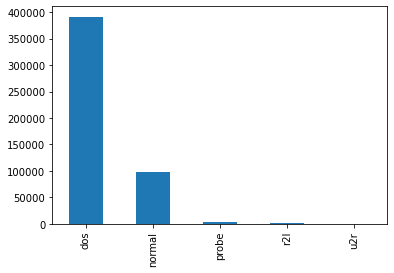

In [18]:
df['target'].value_counts().plot(kind='bar')

We see that the dos is highest in the data followed by normal while probe,r21 and u2r has very low requests

<AxesSubplot:>

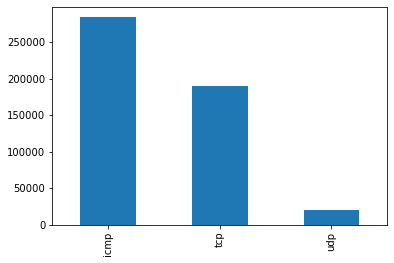

In [19]:
df['protocol_type'].value_counts().plot(kind='bar')

ICMP has the highest presence in the data followed by tcp and udp

<AxesSubplot:>

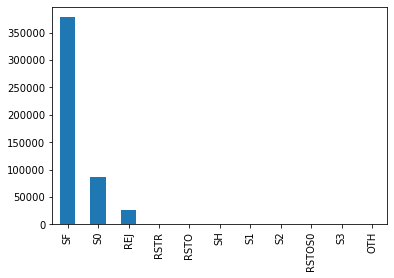

In [20]:
df['flag'].value_counts().plot(kind='bar')

<AxesSubplot:>

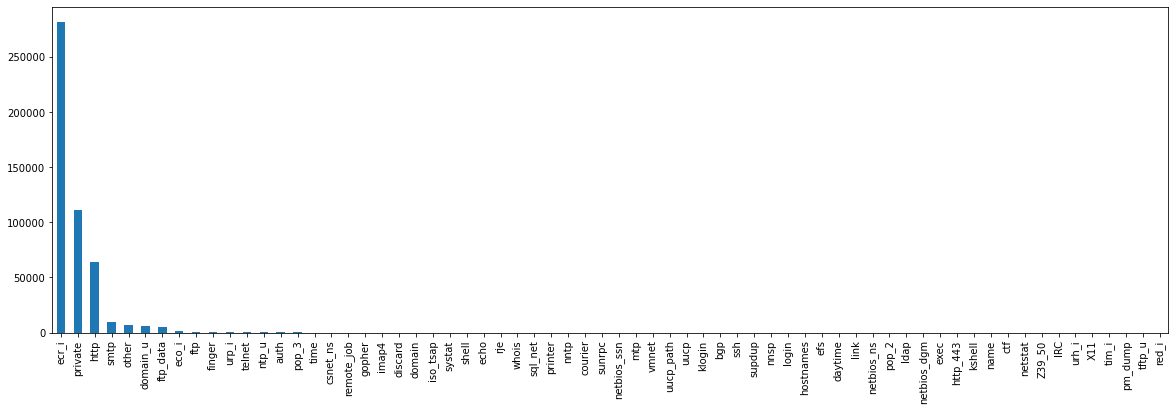

In [21]:
plt.figure(figsize=(20,6))
df['service'].value_counts().plot(kind='bar')

## Preprocessing the data

### Finding the highly correlated columns and removing them

<AxesSubplot:>

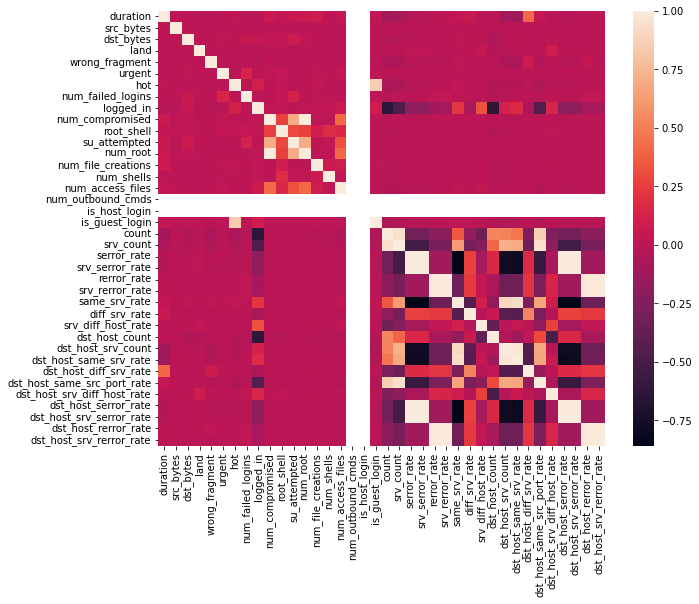

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

Removing the useless num_outbound_cmds column because its a zero array

### Removing Highly Correlated Features

In [23]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

C:\Users\rafay\AppData\Local\Temp\ipykernel_11420\2731660182.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Both are 0 arrays with 0 correlation to data

In [24]:
to_drop.append('is_host_login')
to_drop.append('num_outbound_cmds')

In [25]:
to_drop

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'is_host_login',
 'num_outbound_cmds']

In [26]:
df.drop(to_drop,axis=1,inplace=True)

In [27]:
df.head(10)

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   
5         0           tcp    http   SF        217       2032     0   
6         0           tcp    http   SF        212       1940     0   
7         0           tcp    http   SF        159       4087     0   
8         0           tcp    http   SF        210        151     0   
9         0           tcp    http   SF        212        786     0   

   wrong_fragment  urgent  hot  ...  rerror_rate  same_srv_rate  \
0               0       0    0  ...          0.0            1.0   
1               0       0    0  ...          0.0            1.0   
2               0       0    0  ...          0.0            1.0   
3               0       0    0  ...          0.0            1.0   
4               0       0    0  ...          0.0            1.0   
5               0       0    0  ...          0.0            1.0   
6               0       0    0  ...          0.0            1.0   
7               0       0    0  ...          0.0            1.0   
8               0       0    0  ...          0.0            1.0   
9               0       0    1  ...          0.0            1.0   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0            0.0                 0.0               9                   9   
1            0.0                 0.0              19                  19   
2            0.0                 0.0              29                  29   
3            0.0                 0.0              39                  39   
4            0.0                 0.0              49                  49   
5            0.0                 0.0              59                  59   
6            0.0                 1.0               1                  69   
7            0.0                 0.0              11                  79   
8            0.0                 0.0               8                  89   
9            0.0                 0.0               8                  99   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   
5                     0.0                         0.02   
6                     0.0                         1.00   
7                     0.0                         0.09   
8                     0.0                         0.12   
9                     0.0                         0.12   

   dst_host_srv_diff_host_rate  target  
0                         0.00  normal  
1                         0.00  normal  
2                         0.00  normal  
3                         0.00  normal  
4                         0.00  normal  
5                         0.00  normal  
6                         0.04  normal  
7                         0.04  normal  
8                         0.04  normal  
9                         0.05  normal  

[10 rows x 32 columns]

In [28]:
df['target'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: target, dtype: int64

## Performing Train test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x=df.drop('target',axis=1)
y=df['target']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.22, random_state=42)

## Encoding Data


### Encoding categorical columns

In [31]:
cat_columns

['protocol_type', 'service', 'flag', 'target']

In [32]:

cat_columns=cat_columns[:-1]
cat_columns.remove('service')

In [33]:
ordinal=['service']

In [34]:
cat_columns

['protocol_type', 'flag']

In [35]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer

In [36]:
ct=make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),cat_columns),
                           ( BinaryEncoder(),ordinal),
                           remainder='passthrough')

In [37]:
ct.fit(xtrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['protocol_type', 'flag']),
                                ('binaryencoder', BinaryEncoder(),
                                 ['service'])])

In [38]:
xtrain=ct.transform(xtrain)
xtest=ct.transform(xtest)

### Balancing training data

In [39]:
np.unique(ytrain, return_counts=True)

(array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object),
 array([305305,  75950,   3176,    866,     39], dtype=int64))

In [40]:
oss=OneSidedSelection(sampling_strategy=['dos','normal','probe'])
xtrain,ytrain=oss.fit_resample(xtrain,ytrain)

In [41]:
np.unique(ytrain, return_counts=True)

(array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object),
 array([86243, 59192,  2086,   866,    39], dtype=int64))

### Encoding Labels

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
label_encoder=LabelEncoder()

In [44]:
ytrain=label_encoder.fit_transform(ytrain)

In [45]:
ytest=label_encoder.transform(ytest)

**Comparing The shapes before and after encoding**

In [46]:
x.shape,xtrain.shape

((494021, 31), (148426, 49))

## Modelling

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
import timeit

In [48]:
rfc=RandomForestClassifier(n_estimators=10)

In [49]:
start_time = timeit.default_timer()
rfc.fit(xtrain,ytrain)
end_time = timeit.default_timer()

In [50]:
training_accuracy=rfc.score(xtrain,ytrain)
testing_accuracy=rfc.score(xtest,ytest)

In [51]:
pred=rfc.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86153
           1       1.00      1.00      1.00     21328
           2       0.99      0.99      0.99       931
           3       0.98      0.96      0.97       260
           4       0.91      0.77      0.83        13

    accuracy                           1.00    108685
   macro avg       0.98      0.94      0.96    108685
weighted avg       1.00      1.00      1.00    108685



In [52]:
total_time=end_time-start_time

In [53]:
metrics=[['Random Forest Classifier',total_time,training_accuracy,testing_accuracy]]

In [54]:
model_results=pd.DataFrame(metrics,columns=['Model Name','Execution time','Training Accuracy','Testing Accuracy'])

In [55]:
model_results

Model Name  Execution time  Training Accuracy  \
0  Random Forest Classifier        1.302286           0.999933   

   Testing Accuracy  
0          0.999347

### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtc=DecisionTreeClassifier()

In [58]:
start_time = timeit.default_timer()
dtc.fit(xtrain,ytrain)
end_time = timeit.default_timer()

In [59]:
training_accuracy=dtc.score(xtrain,ytrain)
testing_accuracy=dtc.score(xtest,ytest)
total_time=end_time-start_time

In [60]:
pred=dtc.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86153
           1       1.00      1.00      1.00     21328
           2       0.99      0.99      0.99       931
           3       0.98      0.96      0.97       260
           4       0.83      0.77      0.80        13

    accuracy                           1.00    108685
   macro avg       0.96      0.94      0.95    108685
weighted avg       1.00      1.00      1.00    108685



In [61]:
metrics=['Decision Tree Classifier',total_time,training_accuracy,testing_accuracy]

In [62]:
model_results.loc[len(model_results.index)]=metrics

### Multinomial Naive bayes

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
mnb=MultinomialNB()

In [65]:
start_time = timeit.default_timer()
mnb.fit(xtrain,ytrain)
end_time = timeit.default_timer()

In [66]:
training_accuracy=mnb.score(xtrain,ytrain)
testing_accuracy=mnb.score(xtest,ytest)
total_time=end_time-start_time

In [67]:
pred=mnb.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     86153
           1       0.97      0.55      0.70     21328
           2       0.00      0.00      0.00       931
           3       0.00      0.00      0.00       260
           4       0.00      0.54      0.00        13

    accuracy                           0.90    108685
   macro avg       0.38      0.42      0.33    108685
weighted avg       0.93      0.90      0.90    108685



In [68]:
metrics=['Multinomial Naive bayes',total_time,training_accuracy,testing_accuracy]

In [69]:
model_results.loc[len(model_results.index)]=metrics

### Neural Networks

In [90]:
import tensorflow as tf

In [91]:
neural_network=tf.keras.Sequential([
                tf.keras.layers.Dense(10,activation='relu'),
                tf.keras.layers.Dense(10,activation='relu'),
                tf.keras.layers.Dense(5,activation='softmax')
])

neural_network.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['Accuracy'])

In [92]:
start_time = timeit.default_timer()
neural_network.fit(xtrain,ytrain,epochs=5,batch_size=128,verbose=0)
end_time = timeit.default_timer()

In [93]:
training_accuracy=round(neural_network.evaluate(xtrain,ytrain)[1],5)
testing_accuracy=round(neural_network.evaluate(xtest,ytest)[1],5)
total_time=end_time-start_time

3397/3397 [==============================] - 17s 5ms/step - loss: 44.7721 - Accuracy: 0.9840


In [94]:
pred=neural_network.predict(xtest)
pred=np.argmax(pred,axis=1)
print(classification_report(ytest,pred))

3397/3397 [==============================] - 8s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     86153
           1       0.97      0.97      0.97     21328
           2       0.37      0.39      0.38       931
           3       0.08      0.01      0.01       260
           4       0.00      0.00      0.00        13

    accuracy                           0.98    108685
   macro avg       0.48      0.47      0.47    108685
weighted avg       0.98      0.98      0.98    108685



In [95]:
metrics=['Neural network',total_time,training_accuracy,testing_accuracy]

In [96]:
model_results.loc[len(model_results.index)]=metrics

### XGBoost Classifier

In [97]:
from xgboost import XGBClassifier

In [98]:
xgb=XGBClassifier()

In [99]:
start_time = timeit.default_timer()
xgb.fit(xtrain,ytrain)
end_time = timeit.default_timer()

In [100]:
training_accuracy=xgb.score(xtrain,ytrain)
testing_accuracy=xgb.score(xtest,ytest)
total_time=end_time-start_time

In [111]:
pred=xgb.predict(xtest)
print(classification_report(ytest,pred))
print(confusion_matrix(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86153
           1       1.00      1.00      1.00     21328
           2       1.00      1.00      1.00       931
           3       1.00      0.98      0.99       260
           4       0.93      1.00      0.96        13

    accuracy                           1.00    108685
   macro avg       0.98      0.99      0.99    108685
weighted avg       1.00      1.00      1.00    108685

[[86148     5     0     0     0]
 [    0 21324     3     1     0]
 [    0     2   929     0     0]
 [    0     5     0   254     1]
 [    0     0     0     0    13]]


In [102]:
metrics=['XGBoost Classifer',total_time,training_accuracy,testing_accuracy]

In [103]:
model_results.loc[len(model_results.index)]=metrics

In [104]:
model_results

Model Name  Execution time  Training Accuracy  \
0  Random Forest Classifier        1.302286           0.999933   
1  Decision Tree Classifier        1.073844           0.999993   
2   Multinomial Naive bayes        0.040590           0.802487   
3            Neural network       28.569603           0.969480   
4         XGBoost Classifer       26.347768           0.999993   

   Testing Accuracy  
0          0.999347  
1          0.999310  
2          0.895128  
3          0.984000  
4          0.999844

**By looking at individial accuracies XGBoost performs the best however it's training time is far greater than of Random forest classifier which can be improved by using gpu. Random forest is also performing well but it is ignoring the small class**

## Using all of the dataset on best model

### Imports

In [1]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from category_encoders import BinaryEncoder
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import itertools
import matplotlib.pyplot as plt

### Reading Dataset and Declaring already processed columns

In [2]:
columns=['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']
to_drop=['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'is_host_login',
 'num_outbound_cmds']
attacks={'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'normal': 'normal'}

In [3]:
df=pd.read_csv('kddcup.data.gz',names=columns)
df['target']=df['target'].apply(lambda x:attacks[x[:-1]])

### Preprocessing dataset

**Removing highly correlated columns**

In [4]:
df.dropna(inplace=True)
df.drop(to_drop,axis=1,inplace=True)

**Finding categorical columns**

In [5]:
cat_columns=df.select_dtypes(include=['object']).columns.tolist()
cat_columns=cat_columns[:-1]
cat_columns.remove('service')
ordinal=['service']

**Creating x,y and performing train test split**

In [6]:
x=df.drop('target',axis=1)
y=df['target']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42,stratify=df['target'])

In [7]:
np.unique(ytrain, return_counts=True)

(array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object),
 array([3106695,  778225,   32881,     901,      42], dtype=int64))

**Encoding columns**

In [8]:
ct=make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),cat_columns),
                           ( BinaryEncoder(),ordinal),
                           remainder='passthrough')
ct.fit(xtrain)
xtrain=ct.transform(xtrain)
xtest=ct.transform(xtest)

In [9]:
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.transform(ytest)

## Modelling

In [12]:
xgb=XGBClassifier(tree_method='gpu_hist')

In [13]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

## Evaluate the best model

In [14]:
xgb.score(xtest,ytest)

0.9999591706330695

In [16]:
pred=xgb.predict(xtest)

In [17]:
print(confusion_matrix(ytest,pred))
print('\n')
print(classification_report(ytest,pred))

[[776672      3      0      0      0]
 [     2 194544     10      0      0]
 [     2     12   8207      0      0]
 [     0      5      0    219      1]
 [     0      5      0      0      5]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    776675
           1       1.00      1.00      1.00    194556
           2       1.00      1.00      1.00      8221
           3       1.00      0.97      0.99       225
           4       0.83      0.50      0.62        10

    accuracy                           1.00    979687
   macro avg       0.97      0.89      0.92    979687
weighted avg       1.00      1.00      1.00    979687



## Saving model and encoders

In [18]:
import joblib

In [19]:
joblib.dump(ct, 'make_transformer.save') 

['make_transformer.save']

In [23]:
joblib.dump(xgb, 'model.save') 

['model.save']

In [21]:
joblib.dump(attacks, 'attacks.save') 

['attacks.save']

In [22]:
joblib.dump(to_drop, 'to_drop.save') 

['to_drop.save']

In [24]:
joblib.dump(columns, 'columns.save') 

['columns.save']

In [36]:
joblib.dump(le, 'LabelEncoder.save') 

['LabelEncoder.save']

## Creating Pipeline for custom data

In [124]:
def predict_attacks(data):

    data=data.to_frame().swapaxes('index','columns')
    model=joblib.load('model.save') 
    ct=joblib.load('make_transformer.save') 
    to_drop=joblib.load('to_drop.save')
    le=joblib.load('LabelEncoder.save')
    data.dropna(inplace=True)
    data.drop(to_drop,axis=1,inplace=True)
    xtest=ct.transform(data)
    return le.inverse_transform(model.predict(xtest))

## Testing Pipeline

In [125]:
columns=joblib.load('columns.save')
df=pd.read_csv('kddcup.data_10_percent.gz',names=columns)

In [126]:
import random
attacks=joblib.load('attacks.save')
df['target']=df['target'].apply(lambda x:attacks[x[:-1]])

In [127]:
for i in range(0,10):
    randint=random.randint(0,494020)
    print(predict_attacks(df.iloc[randint][:-1]),df['target'].iloc[randint])

['dos'] dos
['probe'] probe
['dos'] dos
['dos'] dos
['dos'] dos
['normal'] normal
['probe'] probe
['dos'] dos
['dos'] dos
['normal'] normal
